# Sensibility Analysis for the Productivity Model


In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
fig_dir = '../../data_analysis/figures/'

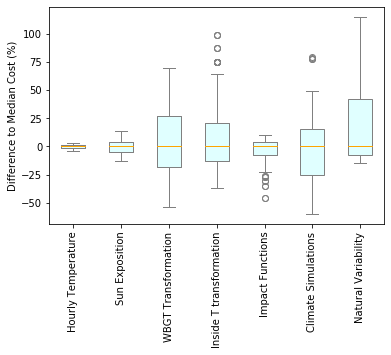

In [14]:
pickle_in =\
open('../../output/productivity_results/sensitivity_99mc.pickle','rb')
sensitivity1 = pickle.load(pickle_in)

sensitivity_files = [sensitivity1]

diff_median_dict = {}

c_=1
for sensitivity in sensitivity_files:
#add column with total loss:
    for v_ in sensitivity:
        for s_ in sensitivity[v_]:
            for y_ in sensitivity[v_][s_]: 
                sensitivity[v_][s_][y_]['total'] = sensitivity[v_][s_][y_][list(sensitivity[v_][s_][y_].columns)].sum(axis=1)
    
    scenarios = ['RCP85']
    y = '2050'
    sensitivity_variables = ['Hourly Temperature', 'Sun Exposition', 'WBGT Transformation', 'Inside T transformation','Impact Functions','Climate Simulations','Natural Variability']

    for s_ in scenarios:    
        fig, ax = plt.subplots()
        diff_median = [] #list with the difference to the difference to the median of each run
        for v_ in sensitivity:
            diff_median.append((sensitivity[v_][s_][y_]['total']-np.median(sensitivity[v_][s_][y_]['total']))/np.median(sensitivity[v_][s_][y_]['total'])*100)
            diff_median_dict[v_] = ((sensitivity[v_][s_][y_]['total']-np.median(sensitivity[v_][s_][y_]['total']))/np.median(sensitivity[v_][s_][y_]['total'])*100)
            if v_ != 'simulations':
                c='lightcyan'
                d='Grey'
                box = ax.boxplot(diff_median, patch_artist=True, boxprops=dict(facecolor=c, color=d),
            capprops=dict(color=d),
            whiskerprops=dict(color=d),
            flierprops=dict(color=d, markeredgecolor=d),
            medianprops=dict(color='orange'))

    
        #ax.boxplot(diff_median, patch_artist=True)
        ax.set_xticks([1,2,3,4,5,6,7])
        ax.set_ylabel('Difference to Median Cost (%)')

        #colors = ['powderblue' for n in range(len(box)+1)]
 
        #for patch, color in zip(box['boxes'], colors):
        #    patch.set_facecolor(color)
        
        ax.set_xticklabels(sensitivity_variables,rotation=90)
        plt.savefig(''.join([fig_dir,'sensitivity_',s_,'_',y,'.pdf']),bbox_inches='tight')
        c_=c_+1

In [ ]:
print(np.quantile(diff_median_dict['temp_in'],0.975))
print(np.quantile(diff_median_dict['t_to_wbgt'],0.975))
print(np.quantile(diff_median_dict['simulations'],0.975))
print(np.quantile(diff_median_dict['years'],0.975))
print(np.quantile(diff_median_dict['impactfunction'],0.975))

print(np.quantile(diff_median_dict['temp_in'],0.025))
print(np.quantile(diff_median_dict['t_to_wbgt'],0.025))
print(np.quantile(diff_median_dict['simulations'],0.025))
print(np.quantile(diff_median_dict['years'],0.025))
print(np.quantile(diff_median_dict['impactfunction'],0.025))

